In [3]:
import os
from re import search
os.getcwd()

'c:\\Users\\ebaca\\Desktop\\cmdresearch'

In [4]:
import astropy
from astropy.io import fits
import astropy.visualization as vis
import numpy as np

# from astropy.cosmology import WMAP9 as wmap
# from astropy.cosmology import Planck18 as planck
import pandas as pd

import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

import time
from IPython.display import display, HTML, Image, clear_output

### Building FitsMapper
will put into a class later on a separate file so it can be used more seamlessly

In [5]:
def FitsMapper(files, hdul_index, nrows, ncols, cmap, interpolation, animation=False, interval=None, stretch=None, vmin=None, vmax=None, contrast=None, bias=None, power=1, percentile=1):
    
    if animation == False:
        fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 9))

    for i, file in enumerate(files):
        with fits.open(file) as hdul:
            data = hdul[hdul_index].data
        
        # creating dictionaries for available intervals and stretches in astropy.visualization (vis in this notebook)
        intervals = {'ZScale': vis.ZScaleInterval(),
                    'MinMax': vis.MinMaxInterval(),
                    'Percentile': vis.PercentileInterval(percentile),
                    'AsymPercentile': vis.AsymmetricPercentileInterval(vmin, vmax),
                    'Manual': vis.ManualInterval(vmin=vmin, vmax=vmax)}
        
        stretches = {'Linear': vis.LinearStretch(),
                    'Asinh': vis.AsinhStretch(),
                    'Log': vis.LogStretch(),
                    'Sqrt': vis.SqrtStretch(),
                    'Hist' : vis.HistEqStretch(data),
                    'Power': vis.PowerStretch(power),
                    'Sinh': vis.SinhStretch(),
                    'Contrast': vis.ContrastBiasStretch(contrast=contrast, bias=bias)}

        # converting data to float type and normalizing
        data = np.nan_to_num(data.astype(float))
        vis_vmin, vis_vmax = np.percentile(data, [vmin, vmax])
        norm = vis.ImageNormalize(data, vmin=vis_vmin, vmax=vis_vmax, interval=intervals[interval], stretch=stretches[stretch])

        if animation == True:
            fig, ax = plt.subplots()
            ax.set_title(search('yr\d+', file).group(), weight='bold', fontsize=17)
            ax.imshow(data, cmap=cmap, norm=norm, interpolation=interpolation)
            plt.tight_layout(pad=0, h_pad=0, w_pad=2)
            plt.show()

            time.sleep(0.1)
            if file != files[-1]:
                clear_output(wait=True)
        else:
            ax = axs[i // 3, i % 3]
            ax.set_title(search('yr\d+', file).group(), weight='bold', fontsize=17)
            ax.imshow(data, cmap=cmap, norm=norm, interpolation=interpolation)
    
    if animation == False:
        plt.tight_layout(pad=0, h_pad=0.2, w_pad=0.2)
        plt.show()

### Comparing K1 Data Year 1 - 9

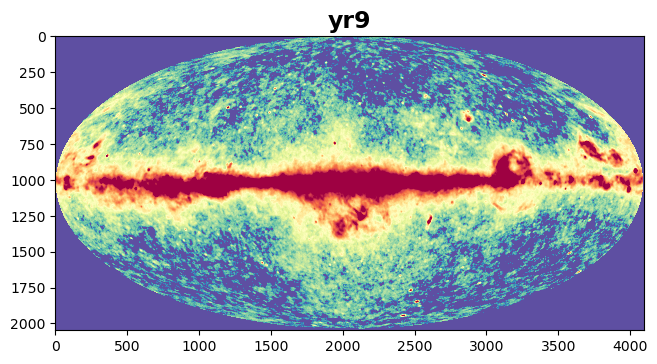

In [6]:
k1_path = os.path.relpath("wmap_data/K1 Broadband")
k1_files = [os.path.join(k1_path, f) for f in os.listdir(k1_path) if f.endswith('.fits')]

FitsMapper(
    files = k1_files,
    hdul_index = 1,
    nrows = 3,
    ncols = 3,
    cmap = 'Spectral_r',
    interpolation = 'hermite',
    interval = 'ZScale',
    stretch = 'Sqrt',
    vmin = 40,
    vmax = 96,
    animation = True
)